<a href="https://colab.research.google.com/github/zaiii145/Task-3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

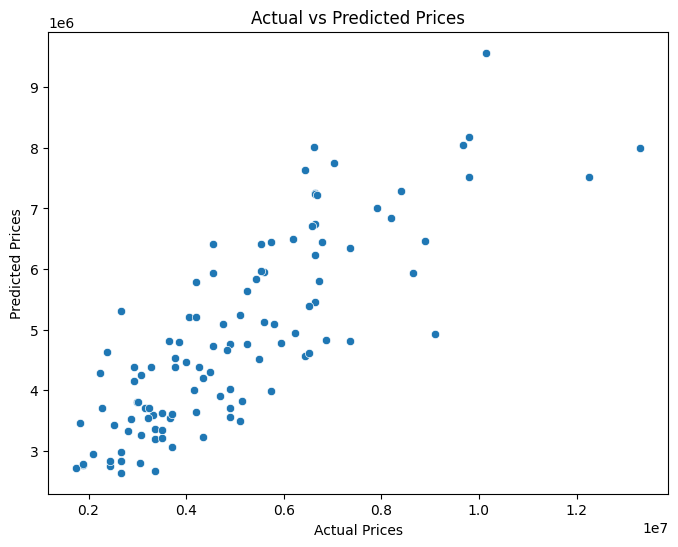

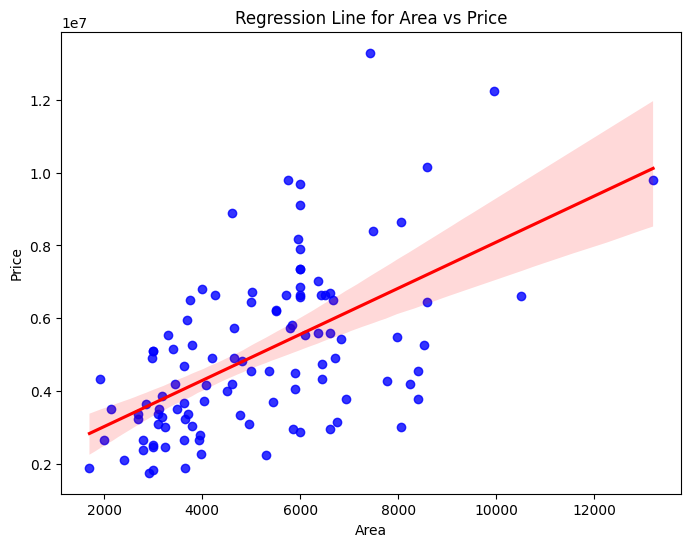

In [4]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load Dataset
# Example: House Price Dataset from Kaggle
df = pd.read_csv('/content/Housing.csv')  # Replace with your correct path

# View Dataset
print(df.head())
print(df.info())

# Data Preprocessing
# Convert categorical data
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})

# Check missing values
print(df.isnull().sum())

# Feature Selection
X = df.drop('price', axis=1)
y = df['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Model
model = LinearRegression()

# Fit Model
model.fit(X_train, y_train)

# Model Coefficients
print("Intercept:", model.intercept_)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("\nMean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", metrics.r2_score(y_test, y_pred))

# Plotting Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot Regression Line for one feature (Example: 'area')
plt.figure(figsize=(8,6))
sns.regplot(x=X_test['area'], y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line for Area vs Price')
plt.show()
